In [ ]:
import pandas as pd
df=pd.read_csv('combined_stock_data.csv')
df.head()

,Date,AAPL,GOOG,MSFT,AMZN,TSLA
0,2010-06-29,7.709074,11.260756,17.675093,5.4305,1.592667
1,2010-06-30,7.569444,11.029968,17.447617,5.4630,1.588667
2,2010-07-01,7.477656,10.894619,17.561350,5.5480,1.464000
3,2010-07-02,7.431314,10.821739,17.644768,5.4570,1.280000
4,2010-07-06,7.482172,10.809839,18.061808,5.5030,1.074000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define stock list and time range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Add company names and concatenate data
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]
for stock, name in zip(tech_list, company_name):
    company_data[stock]["company_name"] = name

df = pd.concat(company_data.values(), axis=0)
df.describe()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,GOOG,GOOG,GOOG,GOOG,GOOG,...,AMZN,AMZN,AMZN,AMZN,AMZN,TSLA,TSLA,TSLA,TSLA,TSLA
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.000000,250.000000,250.000000,2.500000e+02,...,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,220.868841,223.132858,218.293372,220.535494,5.686924e+07,174.173166,176.144509,172.296121,174.167689,1.942366e+07,...,196.538440,198.842640,193.982440,196.557640,4.196700e+07,269.668920,276.451440,262.777600,269.841920,9.625136e+07
std,19.404886,19.116870,19.481476,19.478905,3.309414e+07,12.890321,12.820550,12.904342,12.802580,8.442099e+06,...,19.368665,19.283038,19.382846,19.391655,1.856462e+07,80.259640,82.666125,77.876469,80.788236,3.902276e+07
min,168.225662,168.504345,165.428871,165.757307,2.323470e+07,146.580002,151.059998,142.660004,143.389999,6.809800e+06,...,161.020004,162.960007,151.610001,154.210007,1.500750e+07,162.130005,167.970001,157.509995,158.960007,3.716760e+07
25%,213.409645,215.515662,210.666963,213.153604,3.984452e+07,164.822563,167.022412,163.780583,165.057154,1.406748e+07,...,182.889999,185.070000,180.495003,183.012501,3.023052e+07,213.320004,218.812500,210.367504,214.565006,6.751788e+07
50%,224.504585,226.366475,222.522797,224.464611,4.816945e+07,172.355797,174.468321,169.953352,172.238784,1.700395e+07,...,190.064995,191.550003,187.385002,189.580002,3.748490e+07,248.364998,251.985001,240.629997,247.445000,8.447765e+07
75%,232.820576,234.570783,229.482695,232.752745,6.124680e+07,182.932793,185.033392,181.868777,183.578200,2.132238e+07,...,208.867504,212.527496,206.745003,209.212494,4.538170e+07,335.605011,346.259995,328.487495,340.082512,1.147202e+08
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08,207.473633,208.462496,204.027547,204.267279,5.972800e+07,...,242.059998,242.520004,238.029999,239.020004,1.414484e+08,479.859985,488.540009,457.510010,475.899994,2.438697e+08


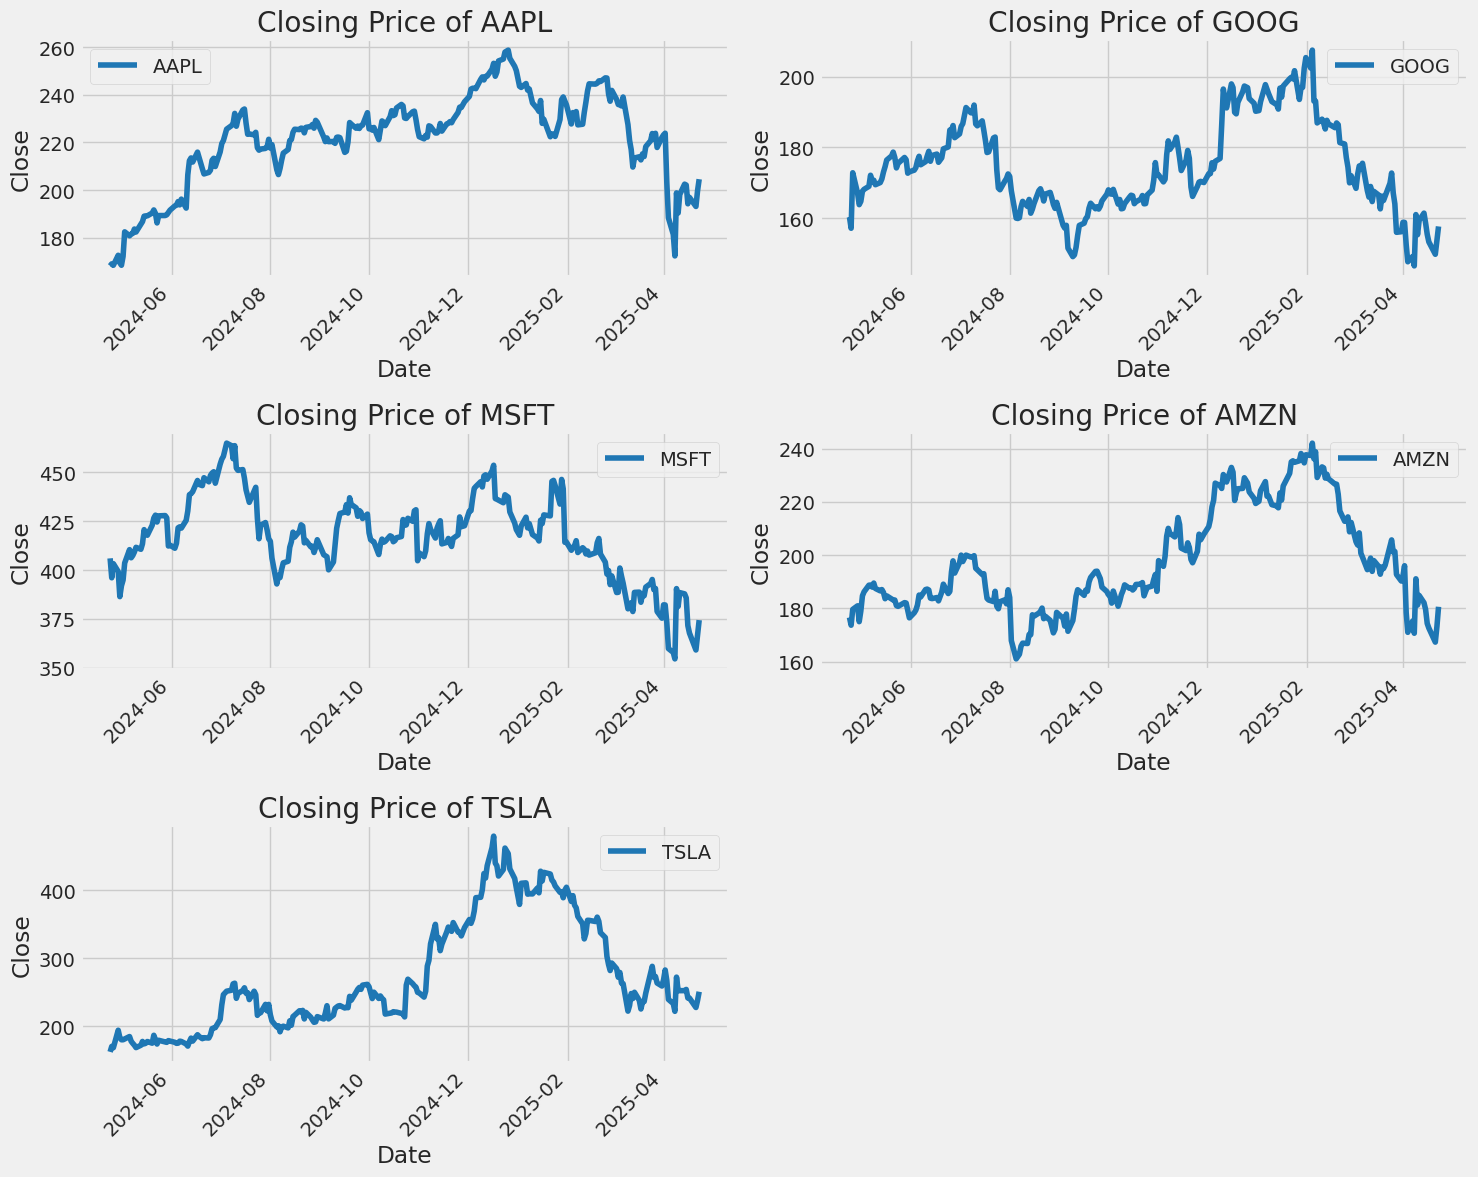

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=0.95, bottom=0.05)

for i, company in enumerate(company_list, 1):
    ax = plt.subplot(3, 2, i)
    company['Close'].plot(ax=ax, label=tech_list[i - 1], color='tab:blue')
    ax.set_ylabel('Close')
    ax.set_title(f"Closing Price of {tech_list[i - 1]}")
    ax.legend()

    # Improve date formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Hide the last (6th) subplot if there are only 5 companies
if len(company_list) < 6:
    plt.subplot(3, 2, 6).axis('off')

plt.tight_layout()
plt.show()


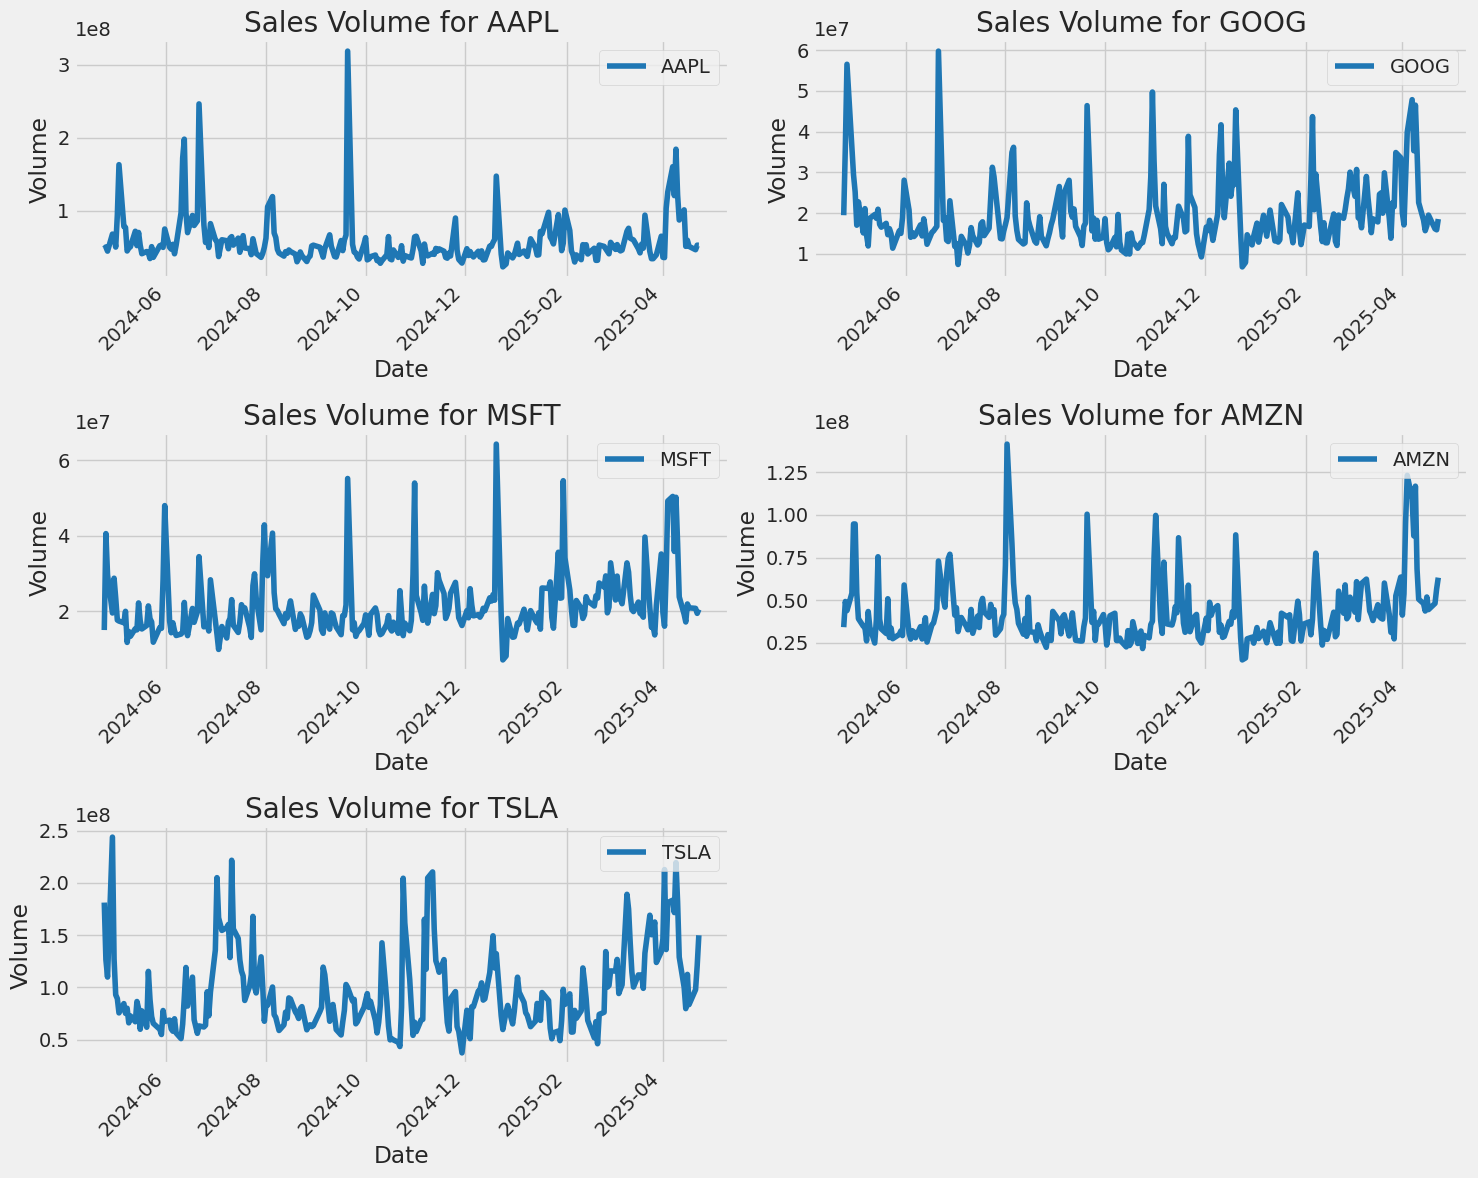

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, company in enumerate(company_list, 1):
    ax = plt.subplot(3, 2, i)
    company['Volume'].plot(ax=ax, label=tech_list[i - 1], color='tab:blue')
    ax.set_ylabel('Volume')
    ax.set_title(f"Sales Volume for {tech_list[i - 1]}")
    ax.legend(loc='upper right')

    # Format date on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# If less than 6 stocks, hide the last empty subplot
if len(company_list) < 6:
    plt.subplot(3, 2, 6).axis('off')

plt.tight_layout()
plt.show()



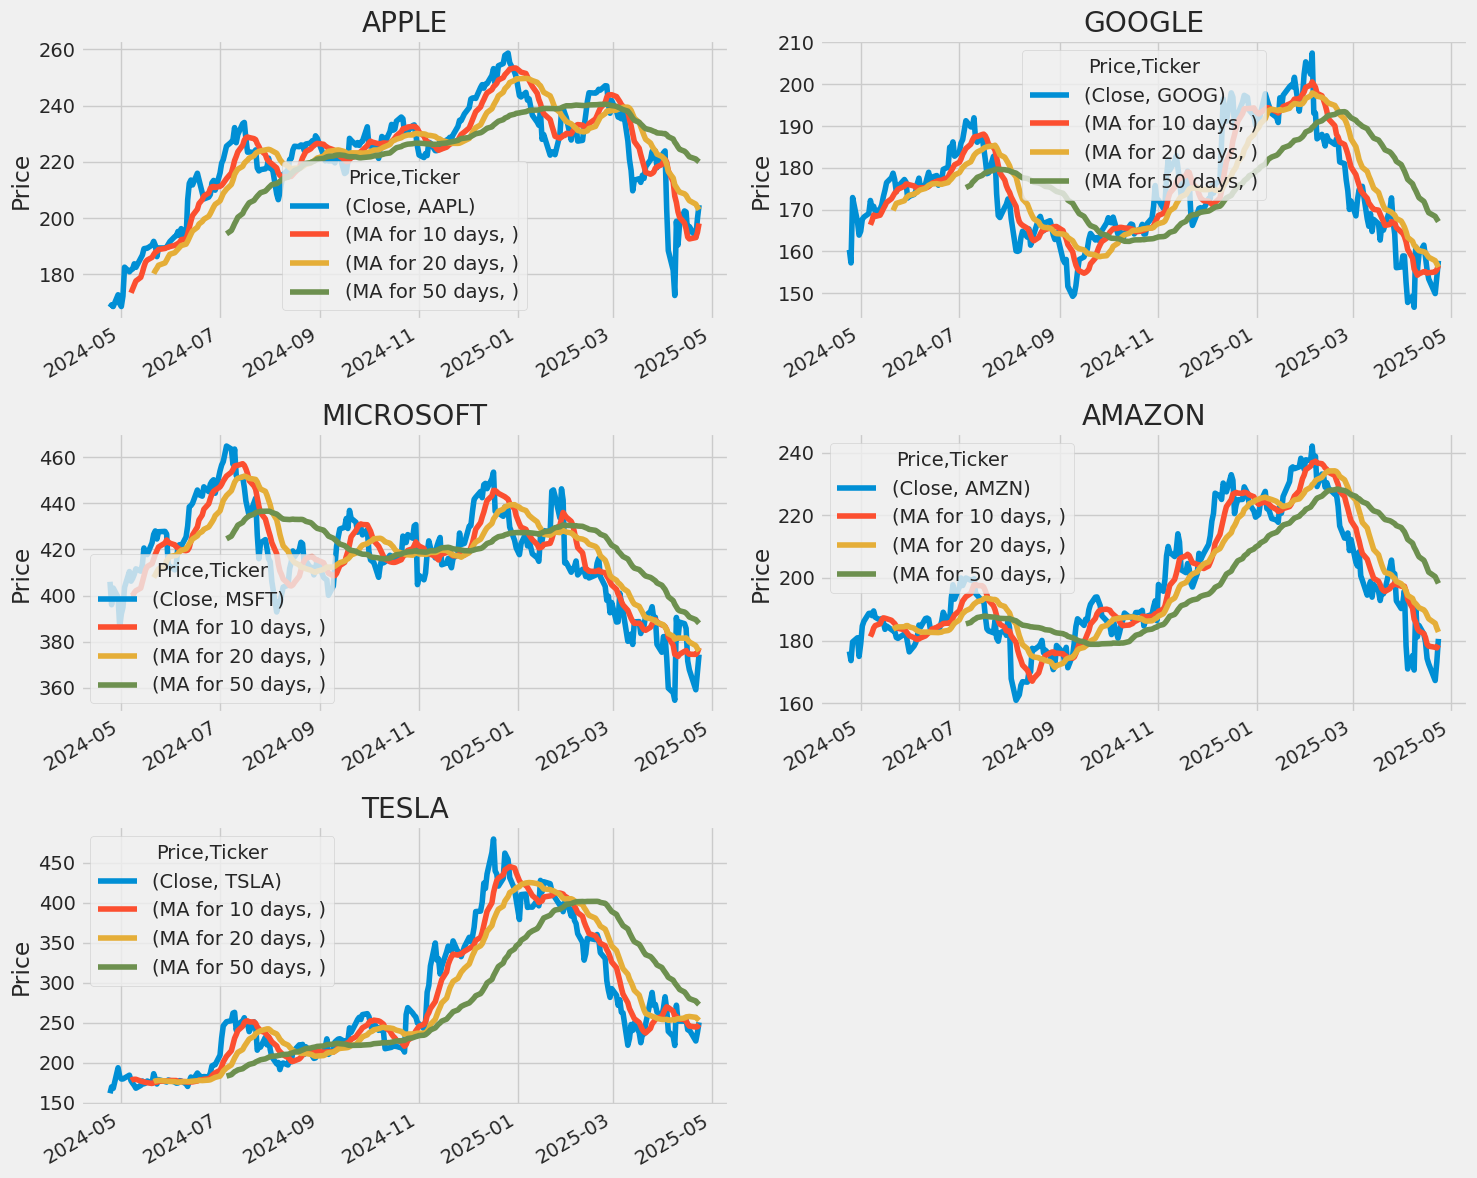

In [ ]:
import matplotlib.pyplot as plt

ma_day = [10, 20, 50]

# Compute moving averages
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

# Set company names in the same order as company_list
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot for each company
for i, (df, name) in enumerate(zip(company_list, company_names)):
    df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Price')

# Hide the unused 6th subplot
if len(company_list) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


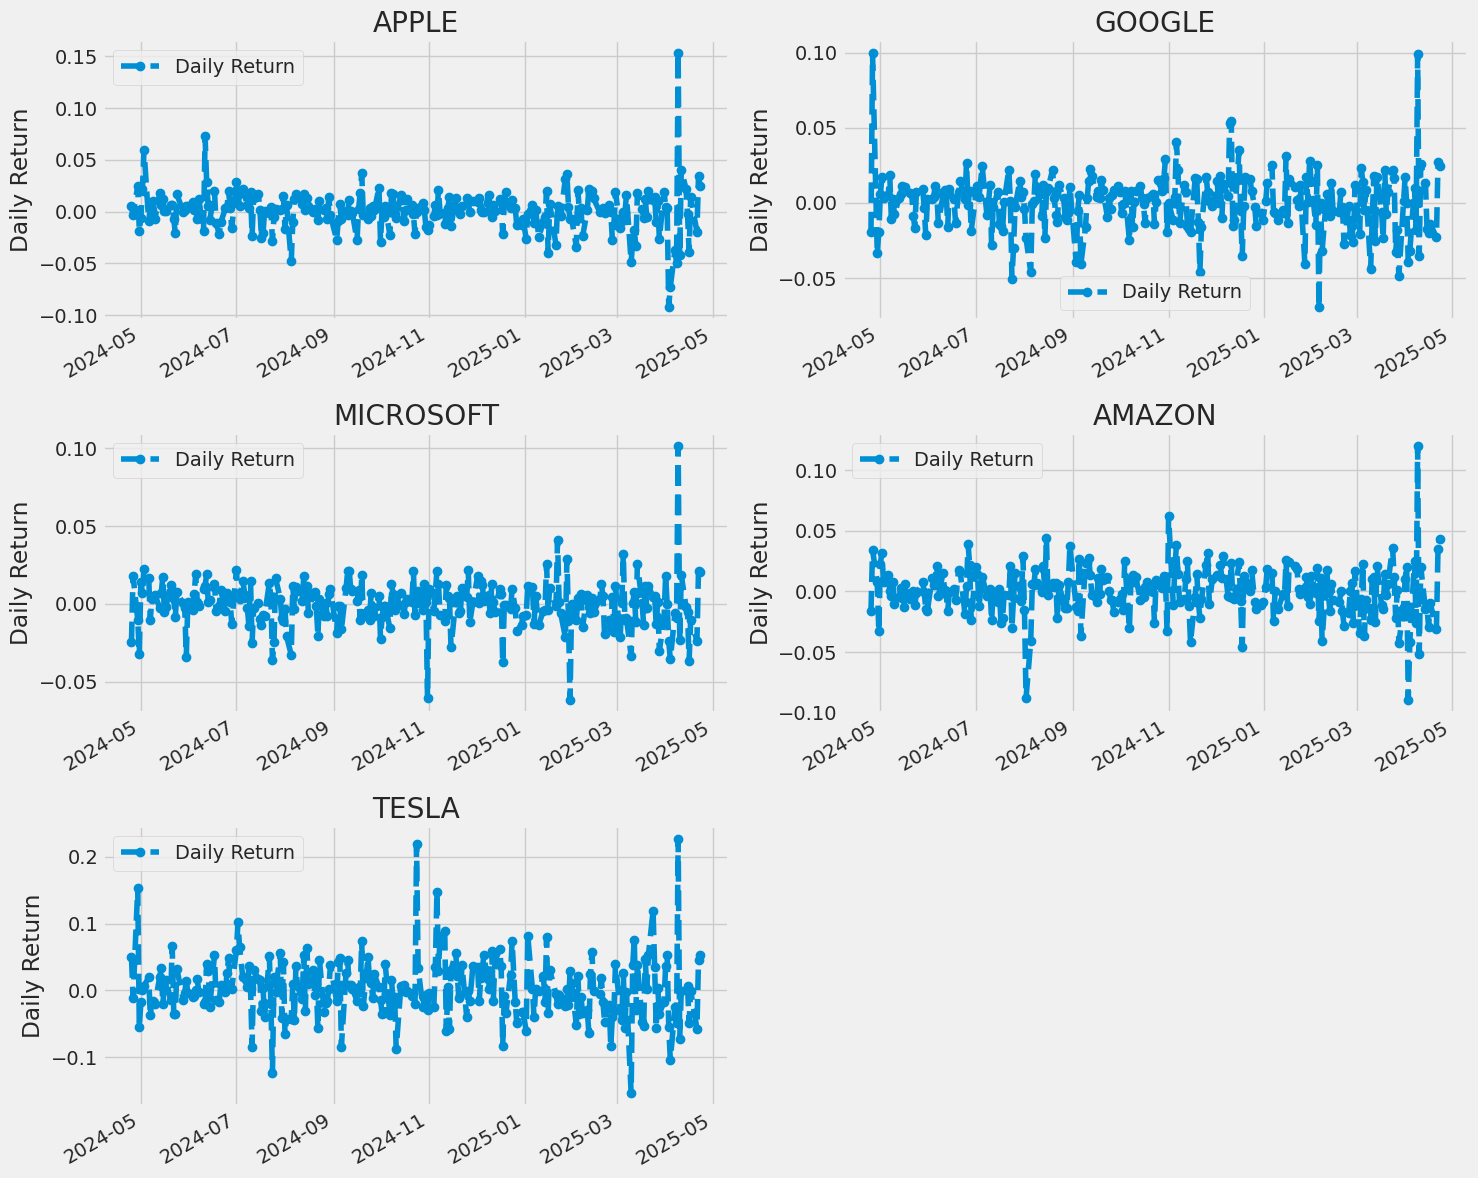

In [ ]:
## What was the daily return of the stock on average
import matplotlib.pyplot as plt

# Calculate daily returns using 'Close' instead of 'Adj Close'
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Names and plot layout
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESLA']

# Create a 3x2 grid of plots (enough for 5 companies)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each company's daily return
for i, (df, name) in enumerate(zip(company_list, company_names)):
    df['Daily Return'].plot(ax=axes[i], legend=True, linestyle='--', marker='o')
    axes[i].set_title(name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Daily Return')

# Turn off the unused 6th subplot
if len(company_list) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd

# List of tech stocks
tech_list = ['AAPL', 'GOOGL', 'AMZN', 'MSFT','TSLA']

# Define start and end dates
start = '2020-01-01'
end = '2025-01-01'

# Fetch the stock data
data = yf.download(tech_list, start=start, end=end)

# Print the columns to check the available ones
print("Available columns:", data.columns)

# If 'Adj Close' exists, use it
if 'Adj Close' in data.columns:
    closing_prices = data['Adj Close']
else:
    # If 'Adj Close' is missing, fall back to 'Close' or any other available column
    closing_prices = data['Close']  # Use 'Close' as fallback

# Display the adjusted close (or fallback close) prices
print(closing_prices.head())


[*********************100%***********************]  5 of 5 completed

Available columns: MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                              

[*********************100%***********************]  5 of 5 completed

Available columns: MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])


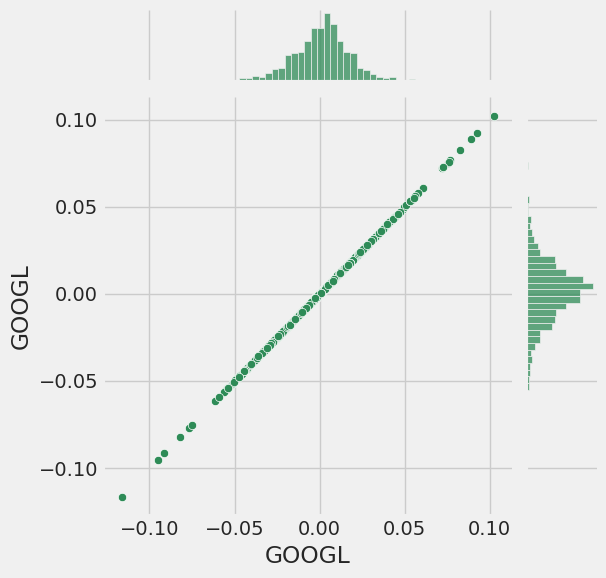

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of tech stocks
tech_list = ['AAPL', 'GOOGL', 'AMZN', 'MSFT','TSLA']

# Define start and end dates
start = '2020-01-01'
end = '2025-01-01'

# Fetch the stock data
data = yf.download(tech_list, start=start, end=end)

# Print the columns to check the available ones
print("Available columns:", data.columns)

# Check if 'Adj Close' exists, else use 'Close'
if 'Adj Close' in data.columns:
    closing_prices = data['Adj Close']
else:
    closing_prices = data['Close']

# Calculate daily returns (percentage change)
tech_rets = closing_prices.pct_change()

# Now you can create the joint plot
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_rets, kind='scatter', color='seagreen')

# Show the plot
plt.show()


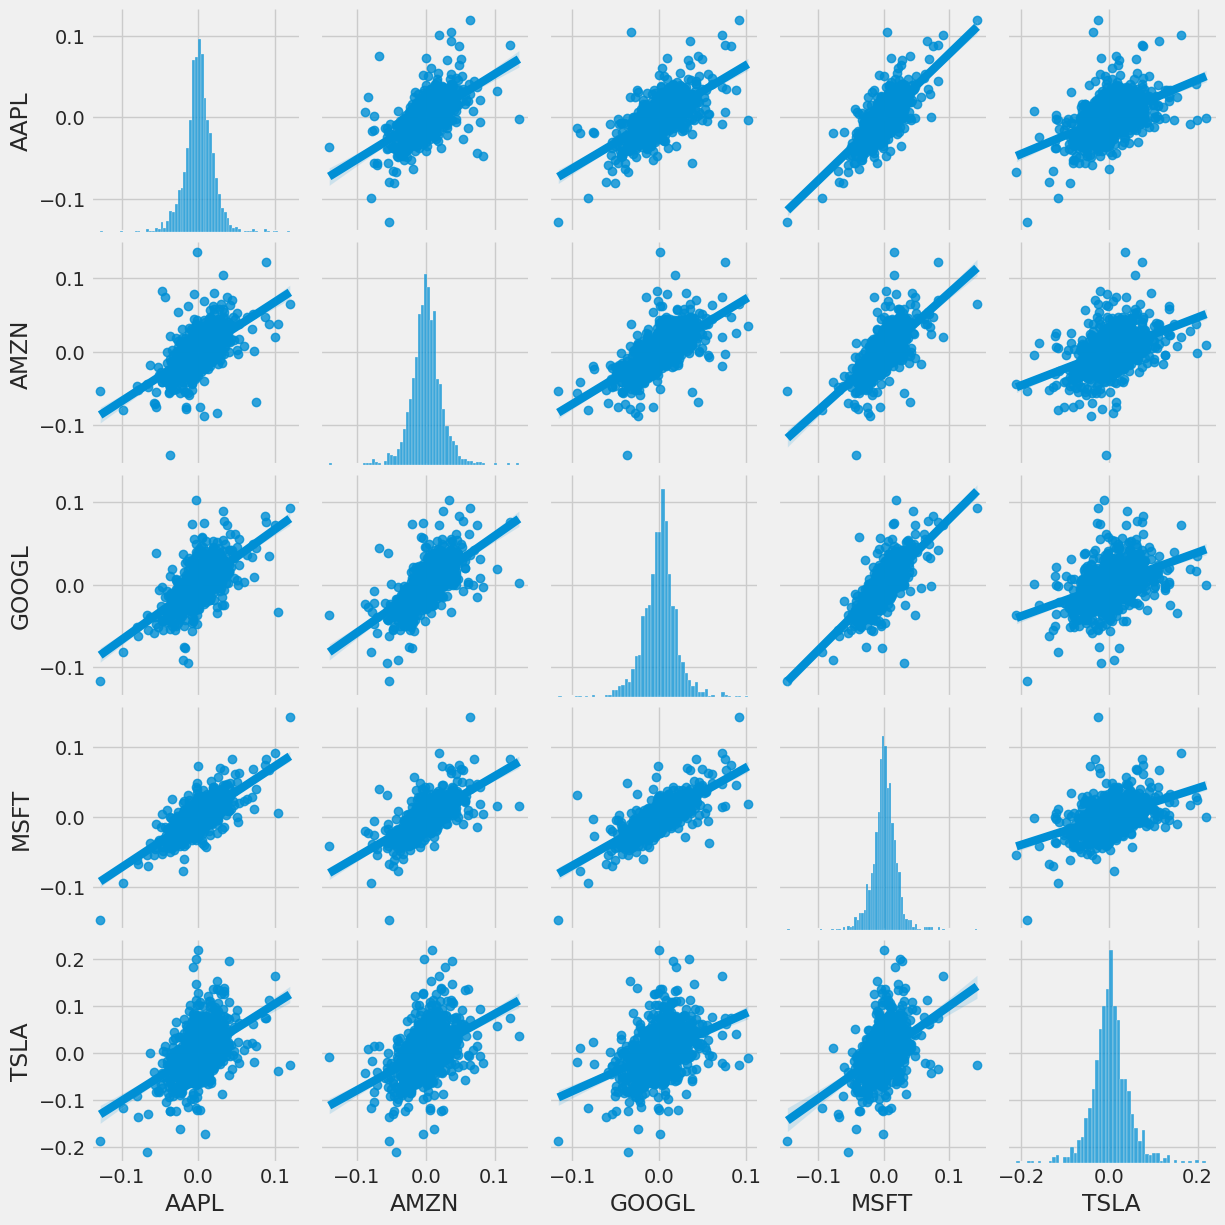

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

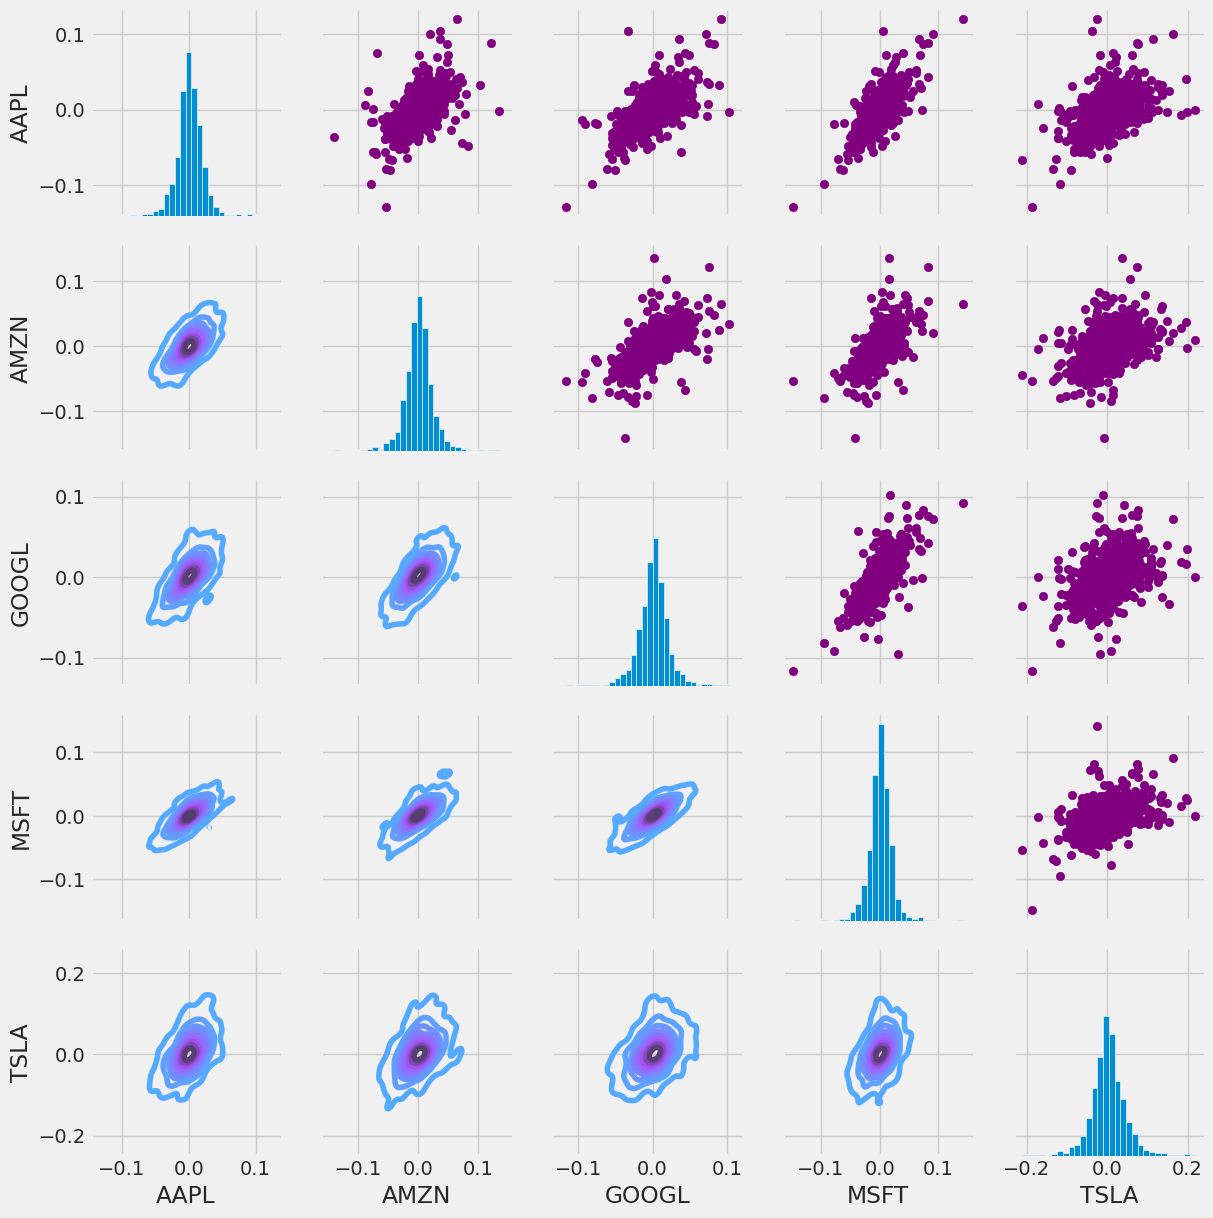

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


Text(0.5, 1.0, 'Correlation of stock return')

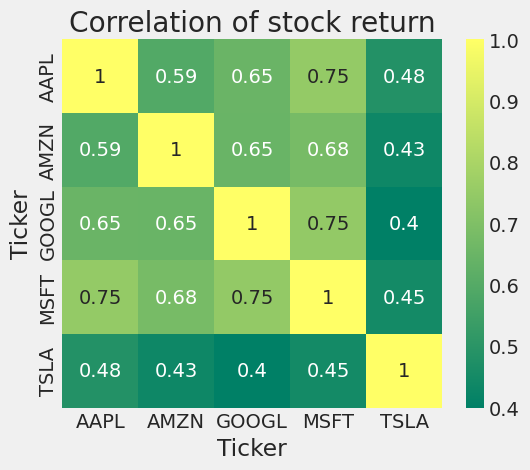

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')



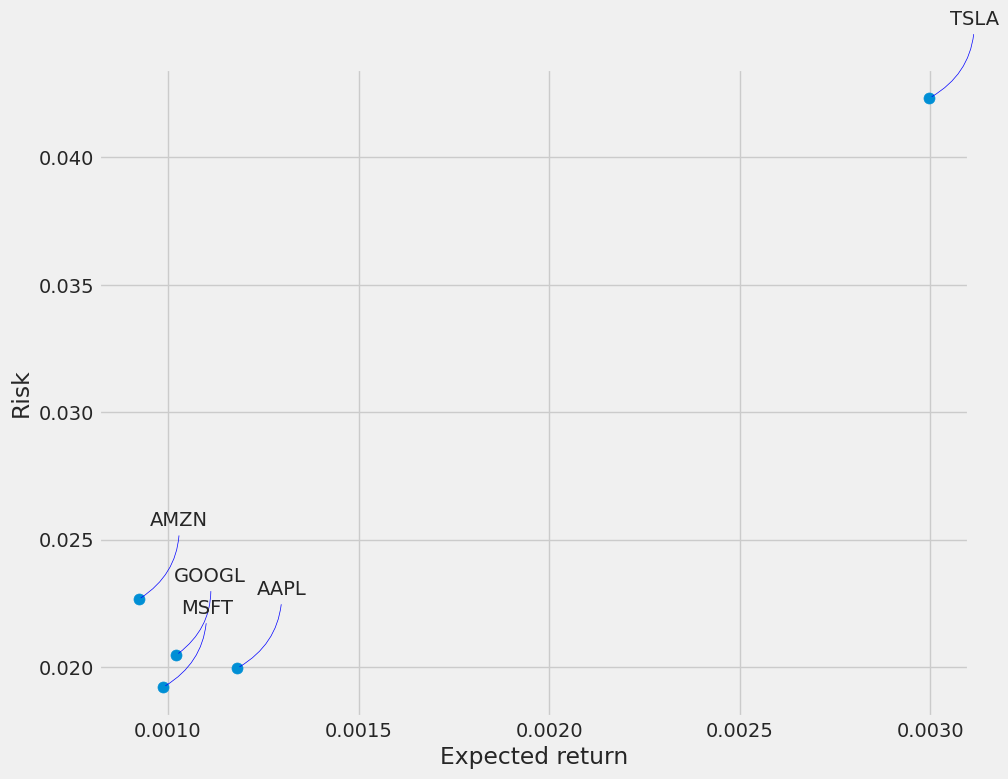

In [ ]:
## How much value do we put at risk by investing in a particular stock
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
##Predicting the closing price stock price of APPLE inc
import yfinance as yf
import datetime

# Fetch the stock data
df = yf.download('AAPL', start='2016-01-01', end=datetime.datetime.now())

# Show the data
print(df)


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2016-01-04   23.834377   23.838903   23.076474   23.214480  270597600
2016-01-05   23.237106   23.947500   23.169235   23.924876  223164000
2016-01-06   22.782364   23.160186   22.594586   22.750690  273829600
2016-01-07   21.820843   22.653406   21.816319   22.325359  324377600
2016-01-08   21.936232   22.422648   21.890984   22.295954  283192000
...                ...         ...         ...         ...        ...
2025-04-16  194.270004  200.699997  192.369995  198.360001   59732400
2025-04-17  196.979996  198.830002  194.419998  197.199997   51334300
2025-04-21  193.160004  193.800003  189.809998  193.270004   46742500
2025-04-22  199.740005  201.589996  195.970001  196.119995   52976400
2025-04-23  204.600006  208.000000  202.800003  206.000000   52863100

[2340 rows x 5 colu

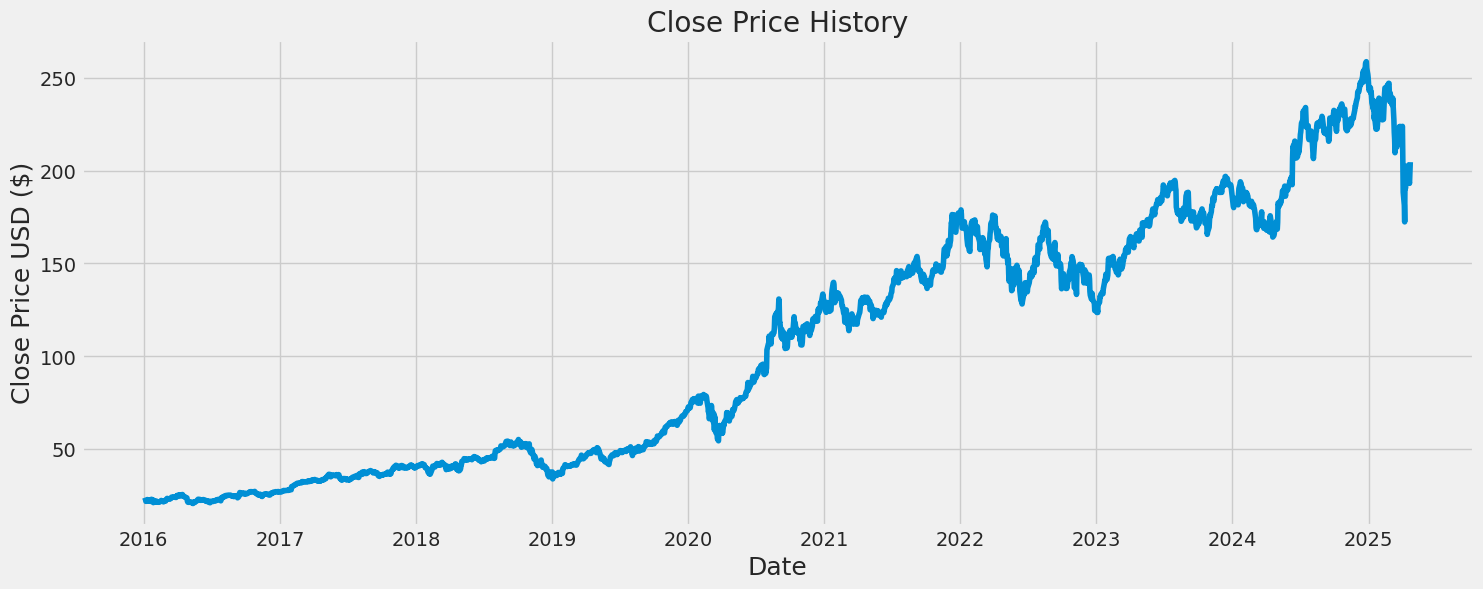

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2223

In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load data from yfinance
ticker = "AMZN"
df = yf.download(ticker, start="2015-01-01", end="2024-01-01")

# Extract just the 'Close' prices
dataset = df[['Close']].values  # Shape will be (n, 1)

# Initialize and scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Show result
print(scaled_data.shape)
print(scaled_data[:5])


[*********************100%***********************]  1 of 1 completed

(2264, 1)
[[0.00626223]
 [0.0044245 ]
 [0.00242128]
 [0.00332998]
 [0.00392224]]


In [ ]:
import numpy as np
import yfinance as yf
import datetime
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data
scaled_data = scaler.fit_transform(dataset)

# Define train_data for training
train_data = scaled_data  # Use scaled data for training

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Last 60 days of data as input
    y_train.append(train_data[i, 0])      # The next day's closing price as output

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3D for LSTM input (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check the shape of x_train
print(x_train.shape)


(2204, 60, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2204/2204 ━━━━━━━━━━━━━━━━━━━━ 97s 43ms/step - loss: 0.0039


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step


np.float64(2.8846524116461336)

In [ ]:
# Use AMZN Close prices
close_column = ('Close', 'AMZN')

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1954/1954 ━━━━━━━━━━━━━━━━━━━━ 90s 44ms/step - loss: 7.8686e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


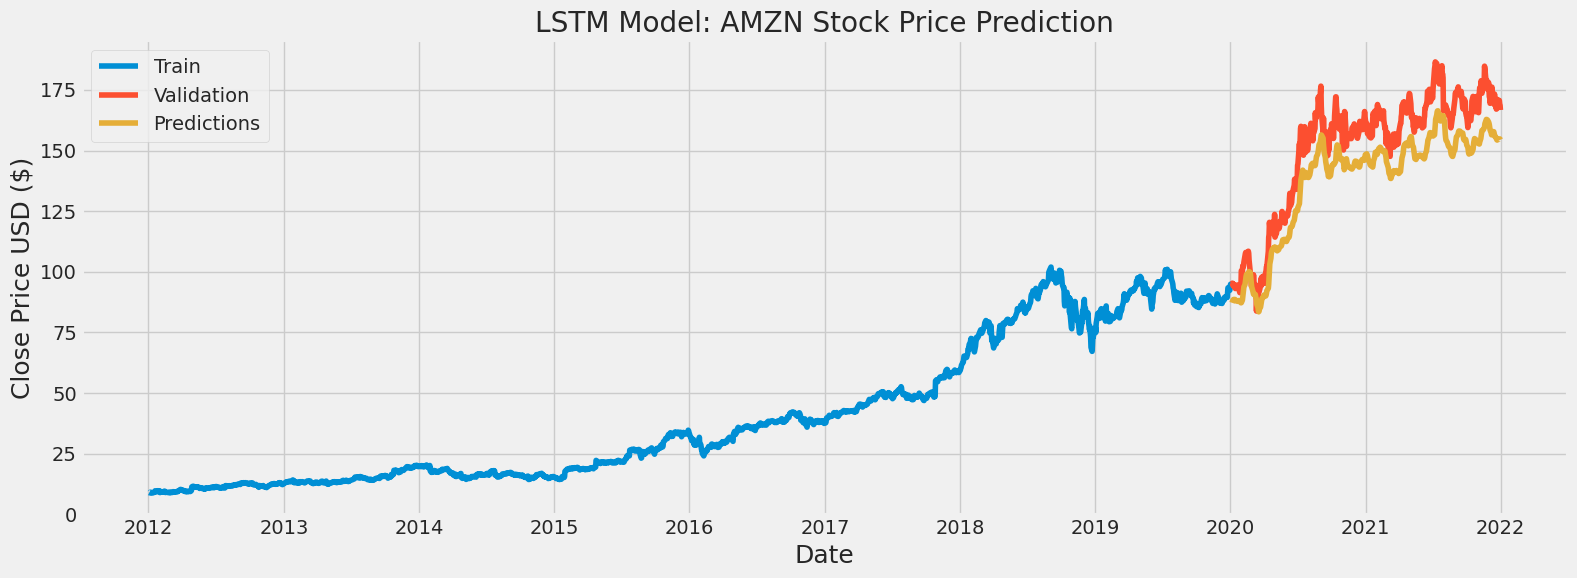

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Step 1: Download data
data = yf.download('AMZN', start='2012-01-01', end='2022-01-01')
data = data[['Close']]

# Step 2: Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create training dataset
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

train_data = scaled_data[0:training_data_len, :]

# Create x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Step 5: Create testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_val = []
y_val = data['Close'].values[training_data_len:]

for i in range(60, len(test_data)):
    x_val.append(test_data[i-60:i, 0])

x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Step 6: Make predictions
predictions = model.predict(x_val)
predictions = scaler.inverse_transform(predictions)

# Step 7: Visualize
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('LSTM Model: AMZN Stock Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'][:training_data_len], label='Train')
plt.plot(valid['Close'], label='Validation')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

def predict_stock_price(ticker='AAPL', forecast_days=30):
    df = yf.download(ticker, start='2010-01-01', end='2024-01-01')
    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * 0.8))

    # Scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Training data
    train_data = scaled_data[0:training_data_len]
    X_train, y_train = [], []
    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

    # LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=0)

    # Future prediction
    input_seq = scaled_data[-60:]
    future_preds = []
    for _ in range(forecast_days):
        pred = model.predict(input_seq.reshape(1, 60, 1), verbose=0)[0, 0]
        future_preds.append(pred)
        input_seq = np.append(input_seq[1:], pred).reshape(60, 1)

    predicted_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

    # Plot
    future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_days)
    plt.figure(figsize=(10, 5))
    plt.plot(data.index[-100:], data['Close'].tail(100), label='Historical')
    plt.plot(future_dates, predicted_prices, label='Predicted')
    plt.legend()
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid()
    plt.tight_layout()
    plt.savefig("prediction_plot.png")
    plt.close()

    return "prediction_plot.png"


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Function to predict and plot stock prices
def predict_stock_price(stock, forecast_days):
    # Download stock data
    data = yf.download(stock, start="2015-01-01", end="2024-01-01")

    # Simulating prediction (replace with actual LSTM prediction)
    valid = data['Close'].iloc[-forecast_days:]
    predictions = valid.values * (1 + np.random.normal(0, 0.01, size=len(valid)))

    # Plot the result
    plt.figure(figsize=(10, 5))
    plt.plot(valid.index, valid.values, label='Actual Price', color='blue')
    plt.plot(valid.index, predictions, label='Predicted Price', color='red')
    plt.title(f'{stock} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price USD ($)')
    plt.legend()

    # Save the plot as an image file
    plot_path = "stock_prediction_plot.png"
    plt.savefig(plot_path)
    plt.close()  # Close the plot to prevent it from showing directly
    return plot_path

# Gradio interface
iface = gr.Interface(
    fn=predict_stock_price,
    inputs=[
        gr.Dropdown(["AAPL", "AMZN", "MSFT", "GOOGL", "TSLA"], label="Select Stock"),
        gr.Slider(1, 90, value=30, step=1, label="Forecast Days")
    ],
    outputs=gr.Image(type="filepath", label="Prediction Plot"),
    title="📈 Stock Price Predictor",
    description="Predict future stock prices using a simulated model."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a214642e44cec3297c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
